# **Reading amazon_reviews_us_Video_v1_00**


In [48]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [11]:
PATH_VIDEOS = r"/content/drive/Shareddrives/MSc Ciencia Datos/Mineria/amazon_reviews_us_Video_v1_00.tsv"

In [29]:
with open(PATH_VIDEOS) as file:
    for i, line in enumerate(file):
        print(i, len(line.split('\t')))

        if i == 15:
            break

0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
15 15


In [28]:
data_videos = pd.read_csv(
    PATH_VIDEOS,
    delimiter = '\t',
    header = 0
)

print(f'Shape: {data_videos.shape}')
data_videos.head()

Shape: (380562, 15)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,49033728,R1P1G5KZ05H6RD,6302503213,748506413,The Night They Saved Christmas [VHS],Video,5,0,0,N,Y,Very satisfied!!,Fast shipping. Pleasure to deal with. Would re...,2015-08-31
1,US,17857748,R106N066IUN8ZV,B000059PET,478710180,"Hamlet / Kline, New York Shakespeare Festival ...",Video,5,0,0,N,Y,The most talented actor ever!,"Kevin Kline is the most versatile, multi-talen...",2015-08-31
2,US,25551507,R7WTAA1S5O7D9,0788812807,981002815,Nascar Dual Powered Calculator (Solar & Batter...,Video,4,0,0,N,Y,Four Stars,great movie,2015-08-31
3,US,21025041,R32HFMVWLYOYJK,6302509939,333219811,"The Man From U.N.C.L.E, Volume 19: The Brain K...",Video,5,0,0,N,Y,Five Stars,i love the martin landau episode,2015-08-31
4,US,40943563,RWT3H6HBVAL6G,B00JENS2BI,538101194,Playboy Video Party Jokes [VHS],Video,3,0,0,N,N,"HOT women, dumb jokes",Y'know what this reminded me of? Those sketch ...,2015-08-31


In [30]:
data_videos.product_category.value_counts()

Video    380562
Name: product_category, dtype: int64

In [31]:
data_videos.product_id.value_counts().count()

77020

In [57]:
data_videos.shape[0]/ data_videos.customer_id.value_counts().count()

1.8121050802100842

In [32]:
data_videos.customer_id.value_counts().count()

210011

In [39]:
data_videos.groupby(by = ['verified_purchase', 'star_rating']).count()['review_id']

verified_purchase  star_rating
N                  1               21964
                   2               15372
                   3               27277
                   4               56436
                   5              163809
Y                  1                5362
                   2                3586
                   3                7425
                   4               15663
                   5               63668
Name: review_id, dtype: int64

In [43]:
data_videos['len_review'] = data_videos['review_body'].apply(lambda x: len(x.split(' ')))

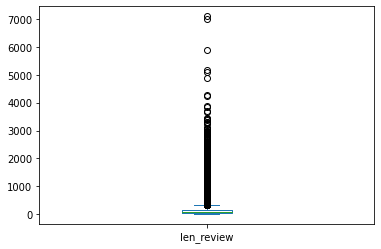

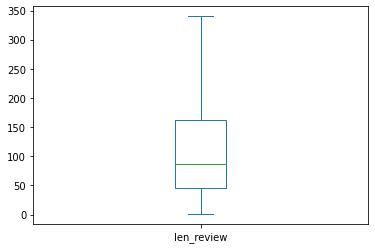

In [50]:
data_videos['len_review'].plot(kind = 'box')
plt.show()

data_videos['len_review'].plot(kind = 'box', showfliers = False)
plt.show()

In [54]:
pd.to_datetime(data_videos.review_date).min(), pd.to_datetime(data_videos.review_date).max()

(Timestamp('1995-11-11 00:00:00'), Timestamp('2015-08-31 00:00:00'))